- Utilize o dataset do Kaggle de SPAM para desenvolver um modelo LSTM com vetorização Glove para detecção de SPAM
- Você deve carregar o dataset (apresentando o dataframe resultante)
- Realizar uma análise exploratória com gráficos e explicações associadas
- Realizar o pré-processamento dos dados com um pipeline de PLN (apresentando o dataframe resultante)
- Fazer a vetorização utilizando modelo Glove (apresentando o dataframe resultante)
- Fazer o treinamento
- Avaliar a acurácia e matriz de confusão obtidas.


Faça o treinamento com algum outro modelo de rede neural e outra abordagem de vetorização, e compare os resultados de acurácia

https://www.kaggle.com/datasets/team-ai/spam-text-message-classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
FILE_PATH = '/content/drive/MyDrive/ponds/SPAM text message 20170820 - Data.csv'

In [3]:
import pandas as pd

# Carregar o Dataset (Apresentando o Dataframe Resultante)

In [100]:
table = pd.read_csv(FILE_PATH)

In [9]:
table

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Realizar uma análise exploratória com gráficos e explicações associadas

In [104]:
import matplotlib.pyplot as plt

In [107]:
a = table['Category'].nunique()
print(f'Tipos diferentes de Category: {a}')

Tipos diferentes de Category: 2


Distribuição entre as classes Spam e não Spam

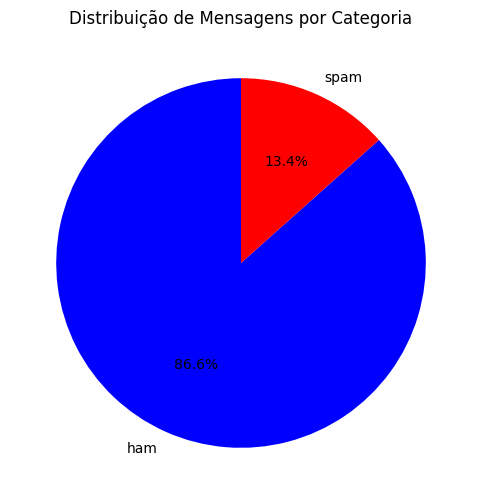

In [109]:
category_counts = table['Category'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'], startangle=90)
plt.title('Distribuição de Mensagens por Categoria')
plt.ylabel('')
plt.show()

# Realizar o pré-processamento dos dados com um pipeline de PLN (apresentando o dataframe resultante)

In [11]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_eng to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package averaged_perceptron_tagger_rus to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_rus.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_d


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [42]:
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk import ne_chunk
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [91]:
def pipe(text):
    tokenizadas = word_tokenize(text, language='english')
    stop_words = set(stopwords.words('english'))
    palavras = [w for w in tokenizadas if w.lower() not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmed = [lemmatizer.lemmatize(w) for w in palavras]
    tagged_words = pos_tag(lemmed)


    return tagged_words

In [92]:
lelis = pipe("Luka Modrić is a Croatian professional footballer who plays as a midfielder for and captains both La Liga club Real Madrid and the Croatia national team. He is regarded as one of the greatest midfielders of all time, and as the best Croatian footballer ever.")

In [93]:
print(lelis)

[('Luka', 'NNP'), ('Modrić', 'NNP'), ('Croatian', 'NNP'), ('professional', 'JJ'), ('footballer', 'NN'), ('play', 'NN'), ('midfielder', 'NN'), ('captain', 'NN'), ('La', 'NNP'), ('Liga', 'NNP'), ('club', 'NN'), ('Real', 'NNP'), ('Madrid', 'NNP'), ('Croatia', 'NNP'), ('national', 'JJ'), ('team', 'NN'), ('.', '.'), ('regarded', 'VBD'), ('one', 'CD'), ('greatest', 'JJS'), ('midfielders', 'NNS'), ('time', 'NN'), (',', ','), ('best', 'JJS'), ('Croatian', 'JJ'), ('footballer', 'NN'), ('ever', 'RB'), ('.', '.')]


In [101]:
tablePipe = table.copy()

In [102]:
for i, row in table.iterrows():
    tablePipe.at[i, 'Message'] = pipe(row['Message'])

In [103]:
tablePipe

,Category,Message
0,ham,"[(Go, VB), (jurong, JJ), (point, NN), (,, ,), ..."
1,ham,"[(Ok, NNP), (lar, NN), (..., :), (Joking, NNP)..."
2,spam,"[(Free, JJ), (entry, NN), (2, CD), (wkly, JJ),..."
3,ham,"[(U, JJ), (dun, NNS), (say, VBP), (early, JJ),..."
4,ham,"[(Nah, VBP), (n't, RB), (think, VB), (go, VB),..."
...,...,...
5567,spam,"[(2nd, CD), (time, NN), (tried, VBD), (2, CD),..."
5568,ham,"[(ü, NN), (b, NN), (going, VBG), (esplanade, J..."
5569,ham,"[(Pity, NN), (,, ,), (*, JJ), (mood, NN), (., ..."
5570,ham,"[(guy, NN), (bitching, VBG), (acted, VBN), (li..."
